1
(1500, 2121, 3)


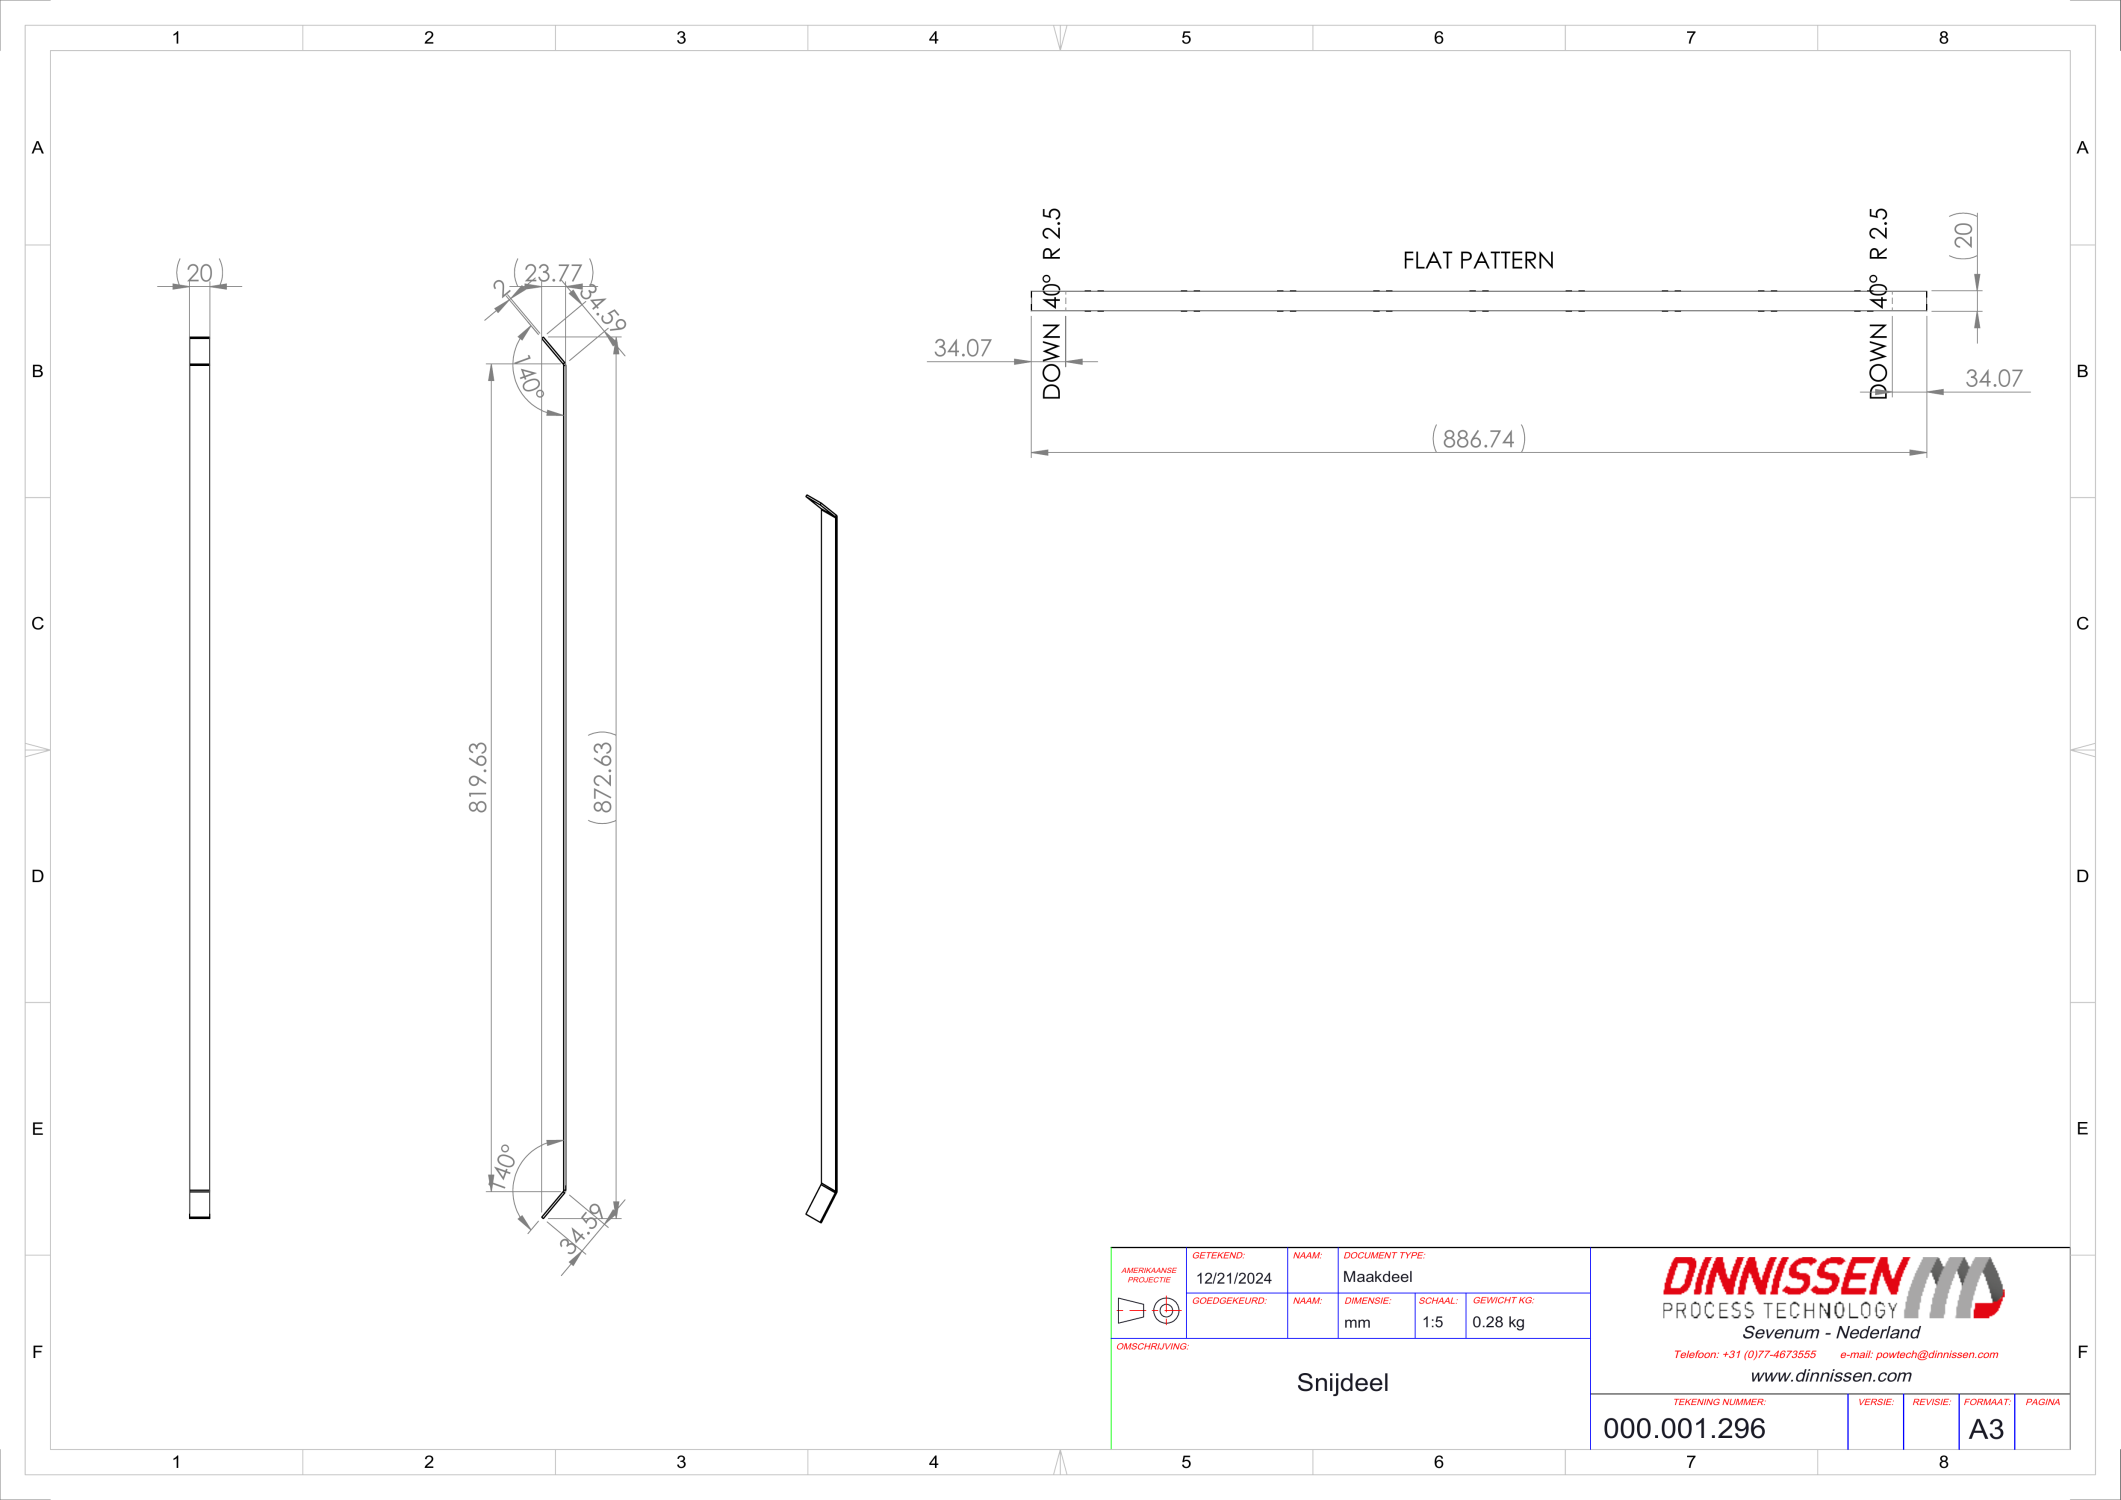

In [1]:
import cv2
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from imutils import resize

pages = convert_from_path('../../data/original/Ugly/000.001.296.pdf', dpi=300)
print(len(pages))
img = np.array(pages[0])
height, width = img.shape[:2]

# Resize if too big
if height * width > 89478485:
    scale_percent = 50  # Scale down to 50% or tune it
    new_width = int(width * scale_percent / 100)
    new_height = int(height * scale_percent / 100)
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

longer = np.argmax(img.shape)

if longer == 0:
    img = resize(img, 1500)
else:
    img = resize(img, height=1500)

print(img.shape)

Image.fromarray(img)

In [2]:
img_copy = img.copy()
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 2
)

kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

contours, hierarchy = cv2.findContours(
    dilated,
    cv2.RETR_CCOMP,
    cv2.CHAIN_APPROX_SIMPLE
)

areas = []

for cnt in contours:
    areas.append(cv2.contourArea(cnt))

def get_sorted_indices(data):
    return [i[0] for i in sorted(enumerate(data), key=lambda x: x[1], reverse=True)]

sorted_indices = get_sorted_indices(areas)

sorted_indices[:5]

[382, 421, 274, 404, 396]

[432 381 383  -1]
[422 420  -1 382]


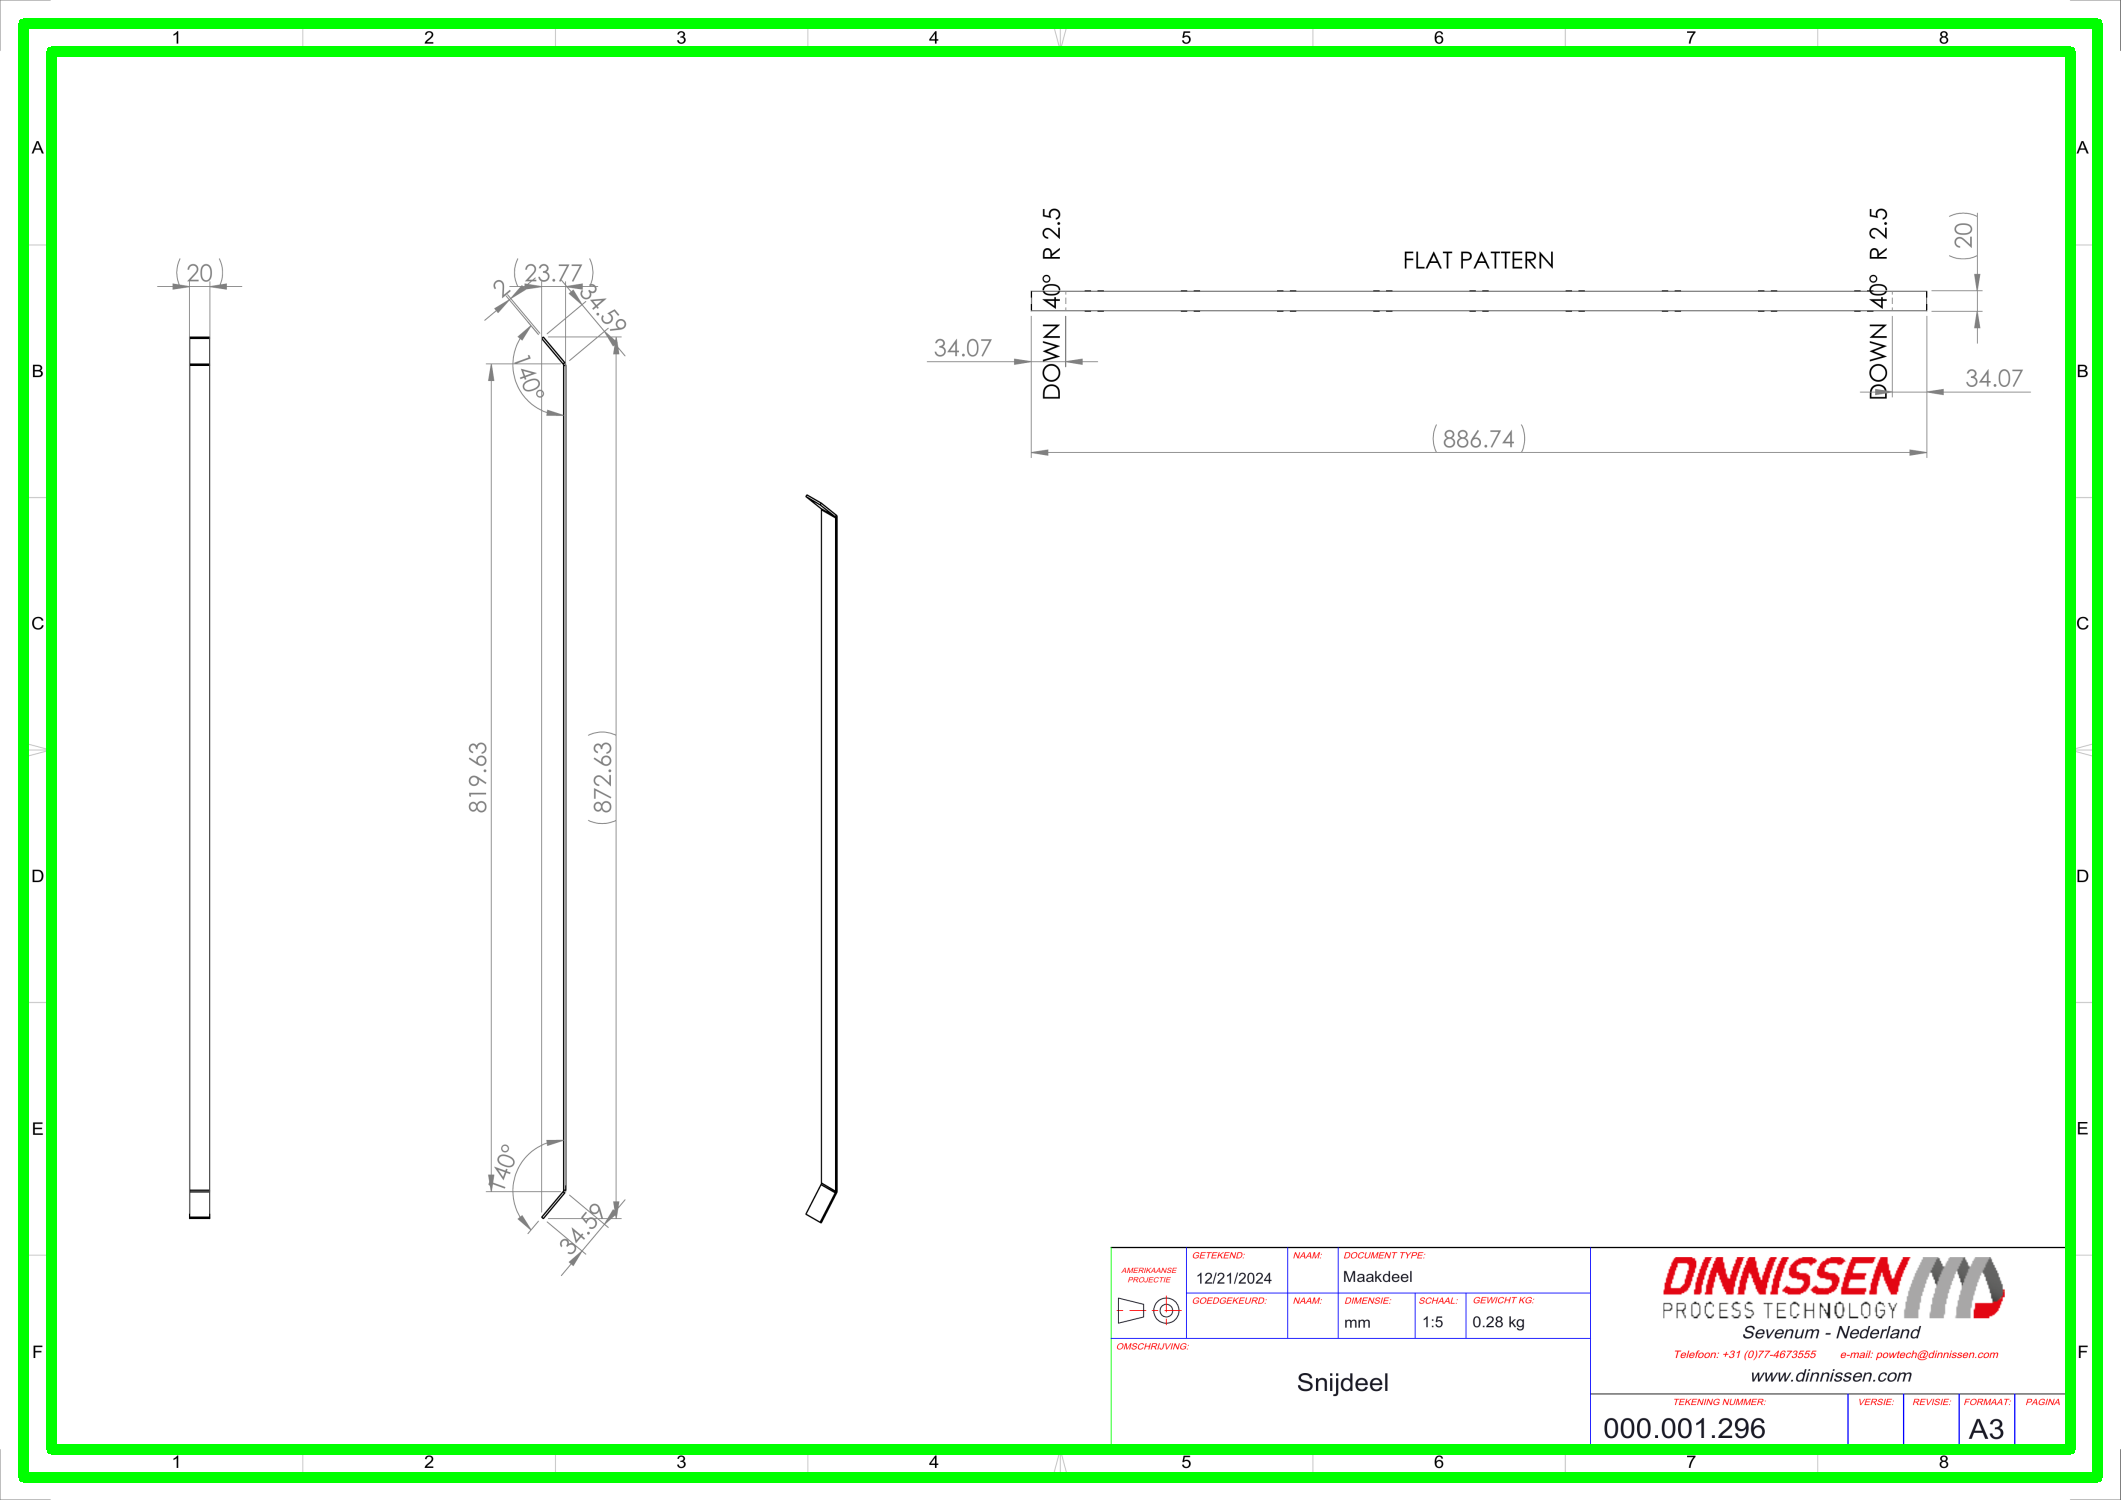

In [3]:
img_comp = img.copy()

index = sorted_indices[0]
print(hierarchy[0][index])
x, y, w, h = cv2.boundingRect(contours[index])
cv2.rectangle(img_comp, (x, y), (x+w, y+h), (0, 255, 0), 10)

index = sorted_indices[1]
print(hierarchy[0][index])
x, y, w, h = cv2.boundingRect(contours[index])
cv2.rectangle(img_comp, (x, y), (x+w, y+h), (0, 255, 0), 10)

Image.fromarray(img_comp)

In [4]:
import random


random.seed(42)


def random_rgb_color():
  """Generates a random RGB color as a tuple of integers (0-255)."""
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)

  return r, g, b


random_rgb_color()

(57, 12, 140)

[227 223 225  -1]
[274 256 265  -1]
[334 264 275  -1]
[344 274 335  -1]
[432 381 383  -1]


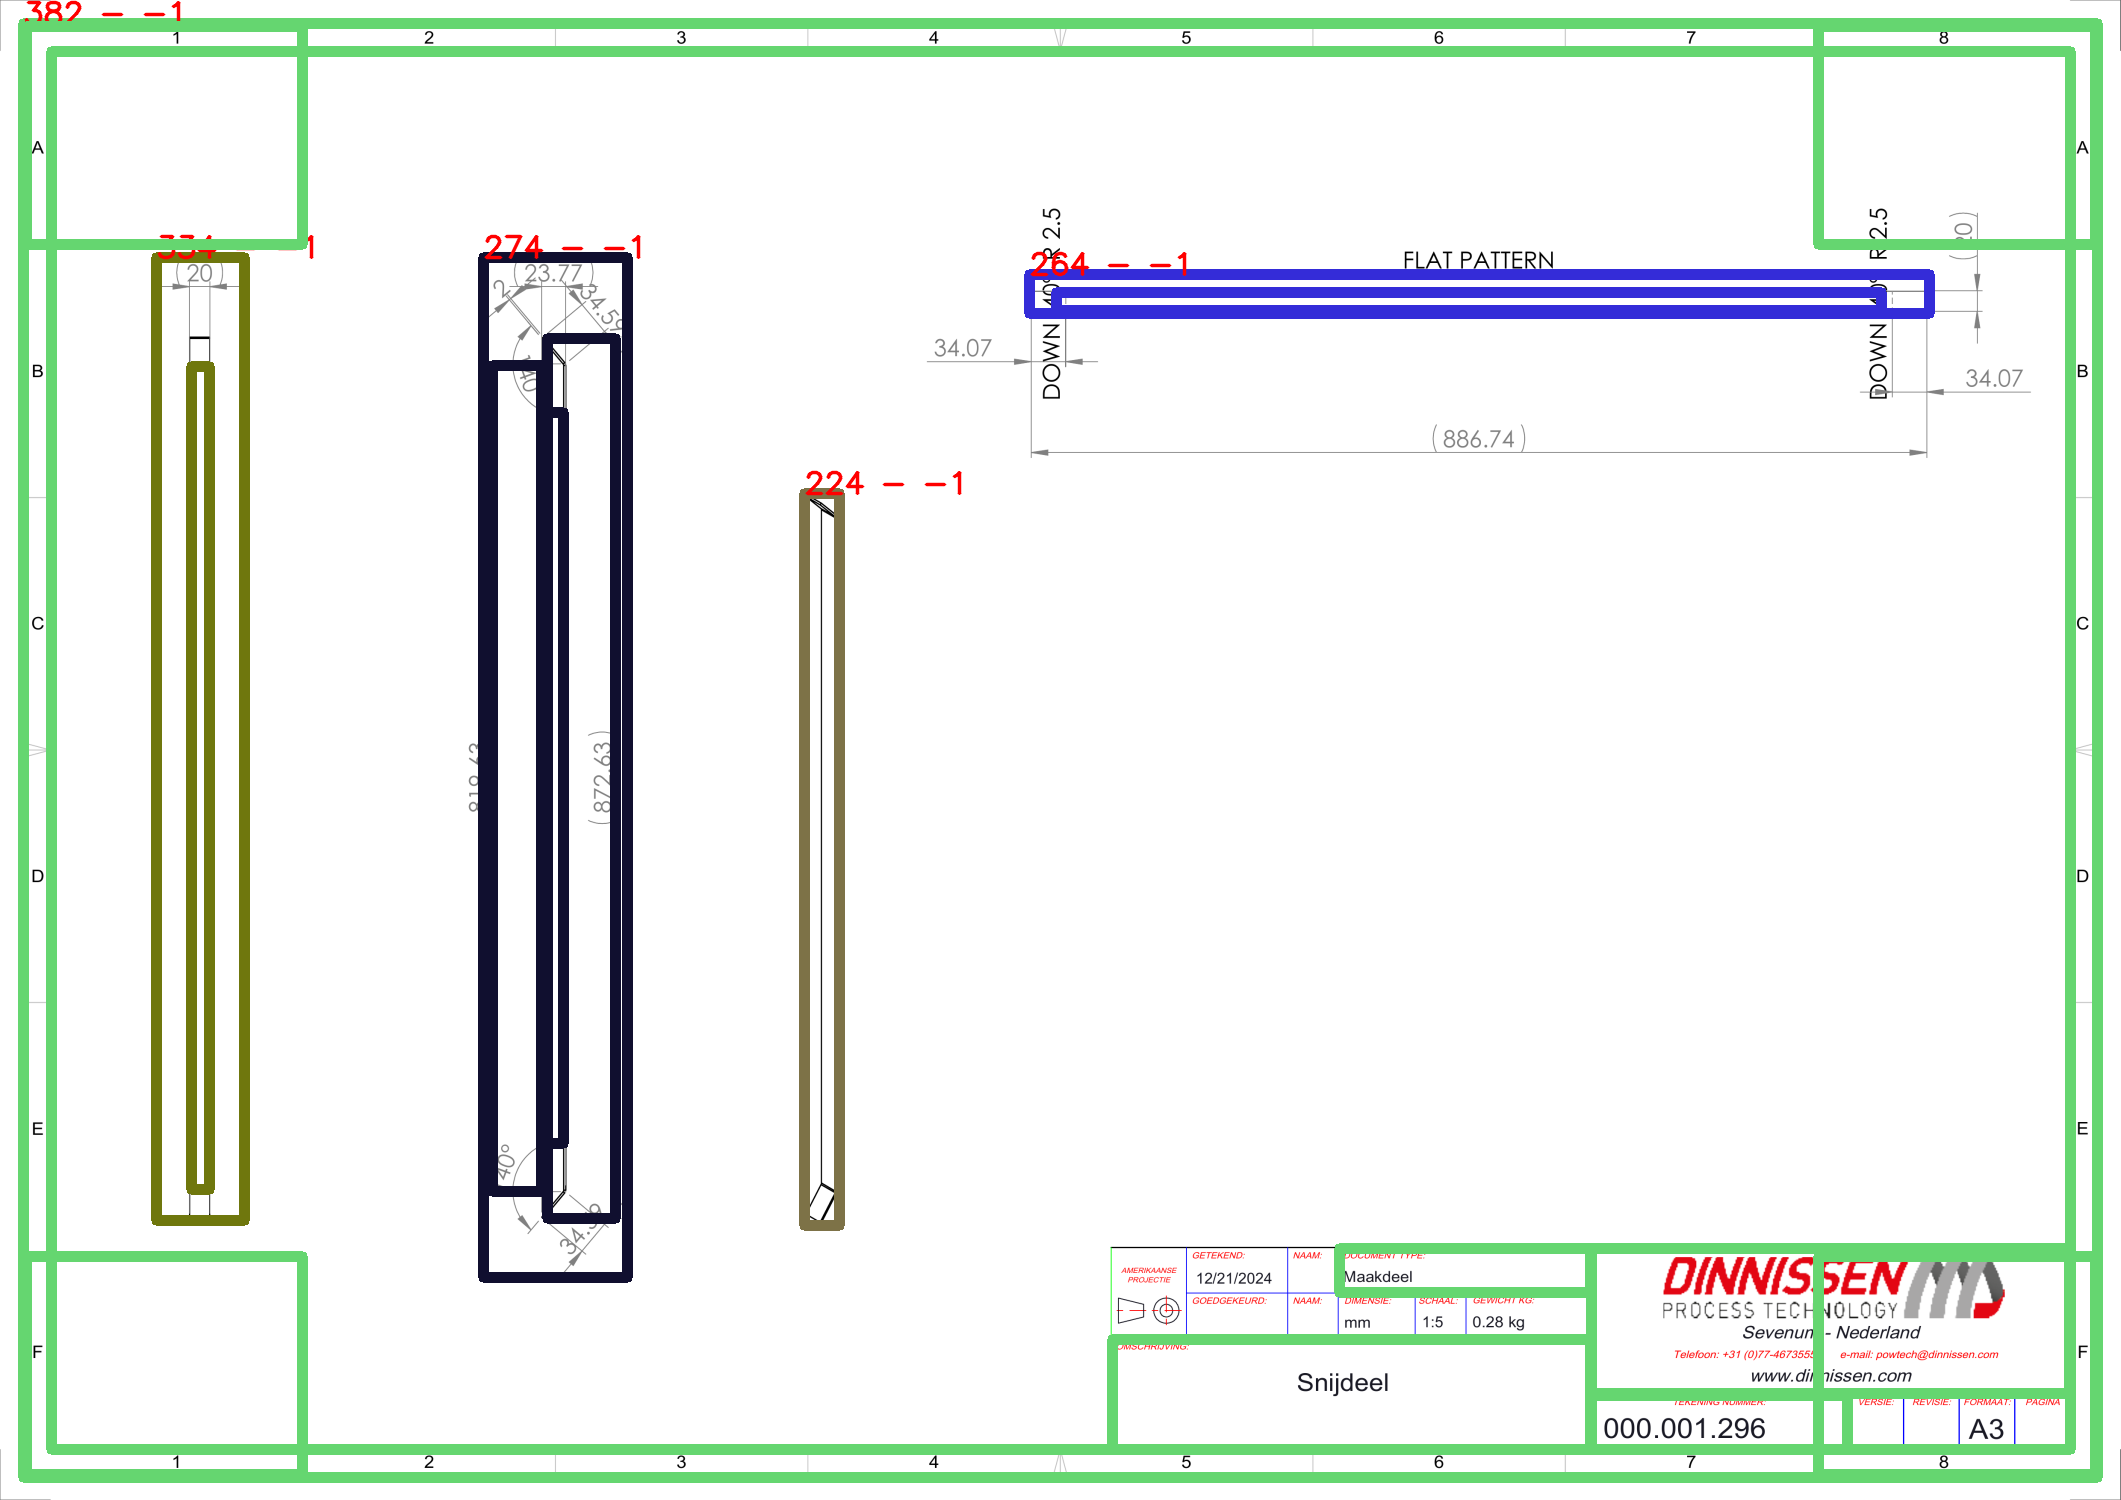

In [5]:
img_comp = img.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

indices = np.expand_dims(np.arange(hierarchy[0].shape[0]), 1)
hierarchy_area = np.concatenate((indices, hierarchy[0], np.expand_dims(areas, 1)), axis=1)
parents = hierarchy_area[(hierarchy_area[:, 4] == -1) & (hierarchy_area[:, 5] > 10000)]

for index in parents:
    index = int(index[0])

    print(hierarchy[0][index])
    x, y, w, h = cv2.boundingRect(contours[index])
    c = random_rgb_color()
    cv2.rectangle(img_comp, (x, y), (x+w, y+h), c, 10)
    cv2.putText(img_comp, f'{index} - {hierarchy[0][index][3]}', (x, y), font, fontScale, color, thickness, cv2.LINE_AA)

    child = hierarchy_area[(hierarchy_area[:, 4] == index) & (hierarchy_area[:, 5] > 10000)]
    for ch in child:
        ch = int(ch[0])
        x, y, w, h = cv2.boundingRect(contours[ch])
        cv2.rectangle(img_comp, (x, y), (x+w, y+h), c, 10)

Image.fromarray(img_comp)